In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

In [2]:
data = pd.read_csv('C:\\Users\\saeid.habibi\\Desktop\\creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
sampled_data_1 = data[data['Class']==0].sample(n=20000)
sampled_data_2 = data[data['Class']==1]
sampled_data = pd.concat([sampled_data_1,sampled_data_2])
sampled_data['Class'].value_counts()

Class
0    20000
1      492
Name: count, dtype: int64

In [9]:
X = sampled_data.iloc[:,:-1].values
y = sampled_data['Class'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [11]:
ks = 8
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.96714379, 0.9767404 , 0.97527651, 0.97641509, 0.9767404 ,
       0.97625244, 0.97625244])

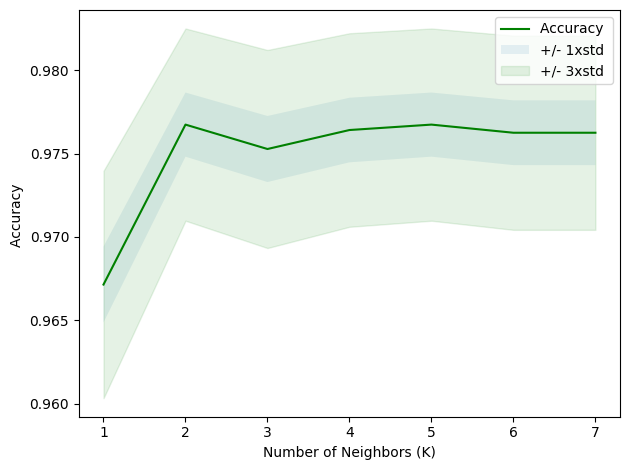

In [12]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [13]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [14]:
yhat = knn.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
print('train accuracy is:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9825711098717234
test accuracy is: 0.9767404033832141


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  19  138]
 [   5 5986]]


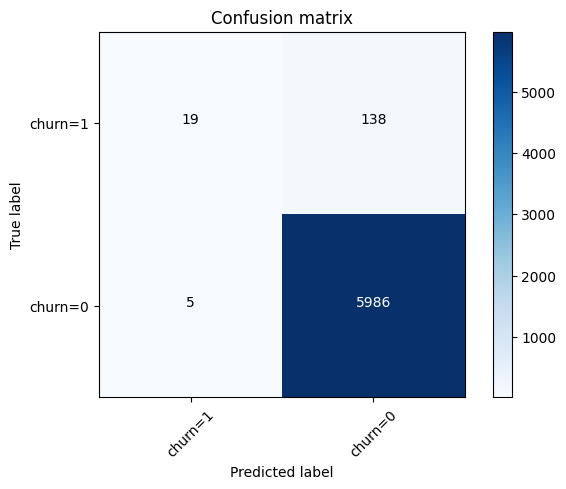

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [18]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5991
           1       0.79      0.12      0.21       157

    accuracy                           0.98      6148
   macro avg       0.88      0.56      0.60      6148
weighted avg       0.97      0.98      0.97      6148



In [19]:
sampled_data['Class'].value_counts()

Class
0    20000
1      492
Name: count, dtype: int64

In [20]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=2)

In [31]:
ks = 8
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.92, 0.89, 0.88, 0.88, 0.86, 0.86, 0.85])

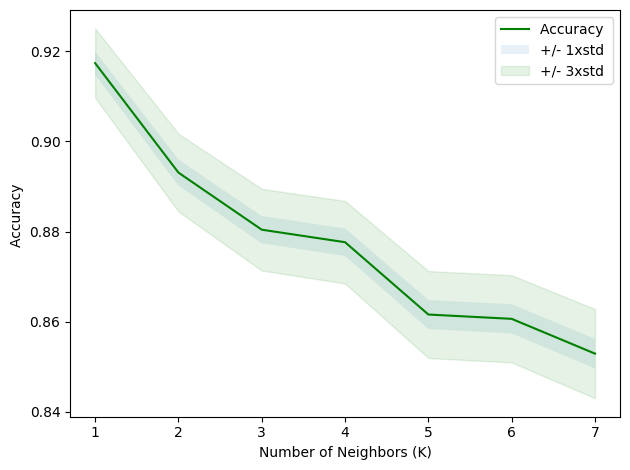

In [32]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [35]:
yhat = knn.predict(X_test)
yhat

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
print('train accuracy is:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9687523249758202
test accuracy is: 0.8930741190765492


Confusion matrix, without normalization
[[5009  822]
 [ 410 5281]]


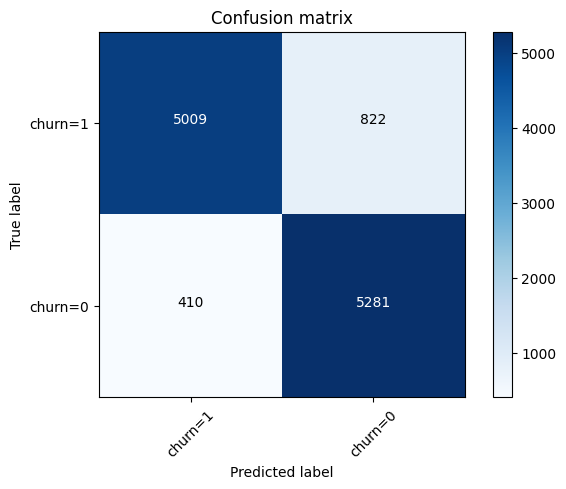

In [37]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [38]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [39]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

c:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

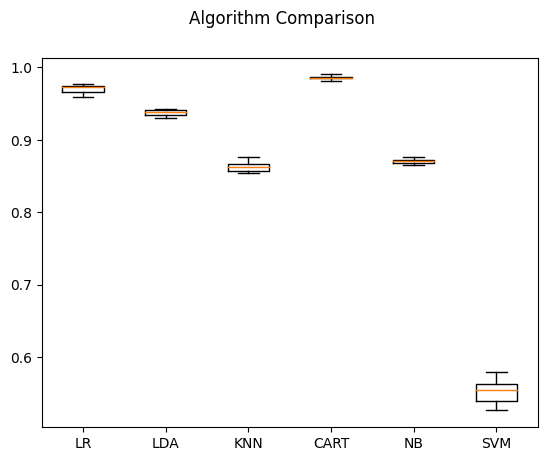

In [40]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [42]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [43]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[1.25e-04, 1.00e+00],
       [9.56e-01, 4.39e-02],
       [8.88e-01, 1.12e-01],
       ...,
       [7.24e-01, 2.76e-01],
       [6.33e-09, 1.00e+00],
       [7.69e-02, 9.23e-01]])

Confusion matrix, without normalization
[[5513  318]
 [  84 5607]]


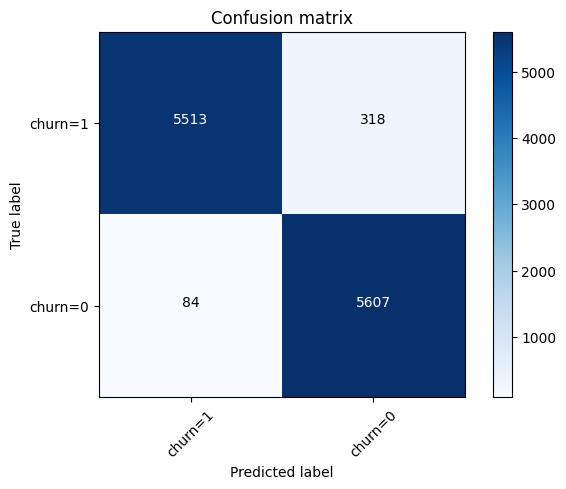

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [45]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5691
           1       0.98      0.95      0.96      5831

    accuracy                           0.97     11522
   macro avg       0.97      0.97      0.97     11522
weighted avg       0.97      0.97      0.97     11522

